In [3]:
pip install flask fastapi xgboost pandas numpy scikit-learn web3 uvicorn transformers requests


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: flask in c:\users\hp\anaconda3\lib\site-packages (3.0.3)
  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached web3-7.10.0-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:01
   ---------------------------------------- 1.0/150.0 MB 1.3 MB/s eta 0:01:53
   ---------------------------------------- 1.3/150.0 MB 1.5 MB/s eta 0:01:42
   ---------------------------------------- 1.8/150.0 MB 1.6 MB/s eta 0:01:32
    --------------------------------------- 2.4/150.0 MB 1.7 MB/s eta 0:01:28
    --------------------------------------- 2.6/150.0 MB 1.6 MB/s eta 0:01:30
    -----------------------

In [9]:
!pip install numpy pandas scikit-learn matplotlib seaborn tensorflow keras torch torchvision torchaudio xgboost lightgbm transformers opencv-python requests flask fastapi uvicorn web3 pymongo

  Using cached torch-2.6.0-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/204.1 MB 837.5 kB/s eta 0:04:04
   ---------------------------------------- 0.8/204.1 MB 838.9 kB/s eta 0:04:03
   ---------------------------------------- 1.0/204.1 MB 867.1 kB/s eta 0:03:55
   ---------------------------------------- 1.0/204.1 MB 867.1 kB/s eta 0:03:55
   ---------------------------------------- 1.3/204.1 MB 808.5 kB/s eta 0:04:11
   ---------------------------------------- 1.3/204.1 MB 808.5 kB/s eta 0:04:11
   ---------------------------------------- 1.6/204.1 MB 776.5 kB/s eta 0:04:21
   -----


   ------------------------------ --------- 158.1/204.1 MB 2.0 MB/s eta 0:00:24
   ------------------------------ --------- 158.1/204.1 MB 2.0 MB/s eta 0:00:24
   ------------------------------- -------- 158.3/204.1 MB 2.0 MB/s eta 0:00:23
   ------------------------------- -------- 158.3/204.1 MB 2.0 MB/s eta 0:00:23
   ------------------------------- -------- 158.6/204.1 MB 2.0 MB/s eta 0:00:23
   ------------------------------- -------- 158.9/204.1 MB 2.0 MB/s eta 0:00:23
   ------------------------------- -------- 158.9/204.1 MB 2.0 MB/s eta 0:00:23
   ------------------------------- -------- 159.1/204.1 MB 2.0 MB/s eta 0:00:23
   ------------------------------- -------- 159.4/204.1 MB 2.0 MB/s eta 0:00:23
   ------------------------------- -------- 159.4/204.1 MB 2.0 MB/s eta 0:00:23
   ------------------------------- -------- 159.4/204.1 MB 2.0 MB/s eta 0:00:23
   ------------------------------- -------- 159.6/204.1 MB 1.9 MB/s eta 0:00:24
   ------------------------------- ----

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
import torch
import xgboost as xgb
from web3 import Web3


In [13]:
df = pd.read_csv("Dataset.csv")  # Ensure correct filename
print(df.head())
print(df.info())
print(df.describe())

     Brand_ID Brand_Name    Country  Year Sustainability_Rating  \
0  BRAND-0001    Brand_1  Australia  2018                     D   
1  BRAND-0002    Brand_2      Japan  2015                     D   
2  BRAND-0003    Brand_3        USA  2024                     A   
3  BRAND-0004    Brand_4      Italy  2023                     D   
4  BRAND-0005    Brand_5        USA  2016                     D   

   Material_Type Eco_Friendly_Manufacturing  Carbon_Footprint_MT  \
0         Tencel                         No                 1.75   
1  Vegan Leather                        Yes               124.39   
2  Vegan Leather                         No               336.66   
3  Bamboo Fabric                         No               152.04   
4  Bamboo Fabric                        Yes               415.63   

   Water_Usage_Liters  Waste_Production_KG Recycling_Programs  Product_Lines  \
0          4511152.79             97844.11                 No              2   
1          1951566.31       

In [15]:
df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing values with mode
print(df.isnull().sum())  # Check if any missing values remain


Brand_ID                      0
Brand_Name                    0
Country                       0
Year                          0
Sustainability_Rating         0
Material_Type                 0
Eco_Friendly_Manufacturing    0
Carbon_Footprint_MT           0
Water_Usage_Liters            0
Waste_Production_KG           0
Recycling_Programs            0
Product_Lines                 0
Average_Price_USD             0
Market_Trend                  0
Certifications                0
dtype: int64


In [17]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders for future use


In [19]:
X = df.drop(columns=["Sustainability_Rating"])  # Features
y = df["Sustainability_Rating"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


X_train shape: (4000, 14), X_test shape: (1000, 14)


In [21]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("✅ Model training completed!")


✅ Model training completed!


In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:\n✅ MAE: {mae:.4f}\n✅ MSE: {mse:.4f}\n✅ R² Score: {r2:.4f}")


📊 Model Evaluation:
✅ MAE: 1.0234
✅ MSE: 1.3111
✅ R² Score: -0.0165


In [25]:
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=7, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("🔥 XGBoost Model Trained!")

# Evaluate XGBoost Model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"📊 XGBoost Model Results:\n✅ MAE: {mae_xgb:.4f}\n✅ MSE: {mse_xgb:.4f}\n✅ R² Score: {r2_xgb:.4f}")


🔥 XGBoost Model Trained!
📊 XGBoost Model Results:
✅ MAE: 1.0480
✅ MSE: 1.4700
✅ R² Score: -0.1396


### Feature Selection (Keep Only Important Features)

In [27]:
# Get Feature Importances from XGBoost
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": xgb_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Select top 8 most important features
selected_features = feature_importance["Feature"][:8].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain XGBoost with selected features
xgb_model_selected = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=7, random_state=42)
xgb_model_selected.fit(X_train_selected, y_train)

y_pred_selected = xgb_model_selected.predict(X_test_selected)

# Evaluate Improved Model
mae_selected = mean_absolute_error(y_test, y_pred_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"🔥 Improved Model Results:\n✅ MAE: {mae_selected:.4f}\n✅ MSE: {mse_selected:.4f}\n✅ R² Score: {r2_selected:.4f}")


🔥 Improved Model Results:
✅ MAE: 1.0575
✅ MSE: 1.4951
✅ R² Score: -0.1591


### Hyperparameter Tuning (GridSearchCV)

In [29]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2],
    "min_child_weight": [1, 3, 5]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring="r2", verbose=2, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"🔥 Best Parameters: {best_params}")

# Train the model with best parameters
best_xgb = xgb.XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred_best = best_xgb.predict(X_test_selected)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"📊 Optimized Model Results:\n✅ MAE: {mae_best:.4f}\n✅ MSE: {mse_best:.4f}\n✅ R² Score: {r2_best:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
🔥 Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}
📊 Optimized Model Results:
✅ MAE: 1.0179
✅ MSE: 1.2928
✅ R² Score: -0.0023


In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
import xgboost as xgb

# Initialize models
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model = xgb.XGBRegressor(**best_params, random_state=42)  # Use best parameters from GridSearch

# Create an ensemble model using Voting Regressor
ensemble_model = VotingRegressor([("RF", rf), ("GB", gb), ("XGB", xgb_model)])

# Train the ensemble model
ensemble_model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(X_test_selected)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"📊 Final Ensemble Model Results:\n✅ MAE: {mae_ensemble:.4f}\n✅ MSE: {mse_ensemble:.4f}\n✅ R² Score: {r2_ensemble:.4f}")


📊 Final Ensemble Model Results:
✅ MAE: 1.0225
✅ MSE: 1.3176
✅ R² Score: -0.0215


In [35]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Apply Polynomial Features (degree 2) to capture nonlinear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Scale the data for better gradient optimization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

print("✅ Feature Engineering Completed: Polynomial Features & Scaling Applied!")


✅ Feature Engineering Completed: Polynomial Features & Scaling Applied!


In [37]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define XGBoost with a wider range of hyperparameters
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

param_dist = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

# Randomized search to find best parameters
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=30, cv=3, scoring="r2", random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Train the best model
best_xgb = random_search.best_estimator_
best_xgb.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"🔥 Optimized XGBoost Model Results:\n✅ MAE: {mae_xgb:.4f}\n✅ MSE: {mse_xgb:.4f}\n✅ R² Score: {r2_xgb:.4f}")


🔥 Optimized XGBoost Model Results:
✅ MAE: 1.0194
✅ MSE: 1.2938
✅ R² Score: -0.0030


In [43]:
!pip install shap

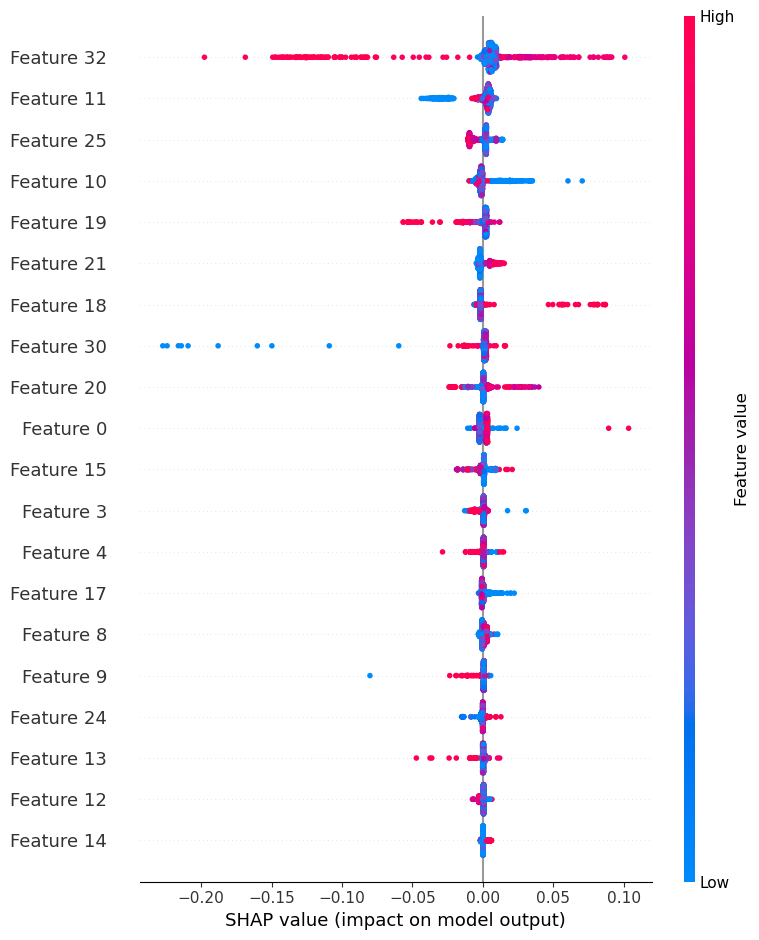

In [45]:
import shap

# Explain the model
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test_scaled)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_test_scaled)

In [47]:
import tensorflow as tf
from tensorflow import keras

# Define Neural Network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_nn = model.predict(X_test_scaled)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"🔥 Neural Network Results:\n✅ MAE: {mae_nn:.4f}\n✅ MSE: {mse_nn:.4f}\n✅ R² Score: {r2_nn:.4f}")


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7878 - mae: 1.1152 - val_loss: 1.3721 - val_mae: 1.0222
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2751 - mae: 0.9790 - val_loss: 1.3291 - val_mae: 1.0121
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1947 - mae: 0.9488 - val_loss: 1.3504 - val_mae: 1.0167
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2174 - mae: 0.9630 - val_loss: 1.3490 - val_mae: 1.0168
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2113 - mae: 0.9588 - val_loss: 1.3337 - val_mae: 1.0111
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1840 - mae: 0.9505 - val_loss: 1.3447 - val_mae: 1.0180
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1854 - mae: 0.9514 - val_loss: 1.3311 - val_mae: 1.0154
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1792 - mae: 0.9485 - val_loss: 1.3286 - val_mae: 1.0129
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [49]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler

# Scale data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Define Neural Network
model = keras.Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_nn = model.predict(X_test_scaled)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"🔥 Optimized Neural Network Results:\n✅ MAE: {mae_nn:.4f}\n✅ MSE: {mse_nn:.4f}\n✅ R² Score: {r2_nn:.4f}")


Epoch 1/150


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.9265 - mae: 1.1181 - val_loss: 1.3998 - val_mae: 0.9982
Epoch 2/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3429 - mae: 0.9785 - val_loss: 1.3708 - val_mae: 1.0082
Epoch 3/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3286 - mae: 0.9782 - val_loss: 1.3461 - val_mae: 1.0054
Epoch 4/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3092 - mae: 0.9812 - val_loss: 1.3411 - val_mae: 1.0077
Epoch 5/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3376 - mae: 0.9965 - val_loss: 1.3368 - val_mae: 1.0084
Epoch 6/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2763 - mae: 0.9758 - val_loss: 1.3427 - val_mae: 0.9976
Epoch 7/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3355 - mae: 1.0039 - val_loss: 1.3187 - val_mae: 1.0060
Epoch 8/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2831 - mae: 0.9799 - val_loss: 1.3122 - val_mae: 1.0059
Epoch 9/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

In [51]:
!pip install web3

In [57]:
model.save("fashion_model.h5")


In [59]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'appp.py', 'Dataset.csv', 'fashion_model.h5', 'Sustainable_Fashion_Project.ipynb', 'truffle-config.js']


In [61]:
model.save("sustainable_fashion_model.h5")


In [1]:
import joblib
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Dummy dataset (replace with actual training data)
X_train = np.random.rand(100, 5)  # Example with 100 samples, 5 features

# Train the scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# Save the scaler to scaler.pkl
joblib.dump(scaler, "C:/Users/hp/UEM MAJOR/scaler.pkl")

print("✅ Scaler saved successfully!")


✅ Scaler saved successfully!
